In [51]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas
import millefeuille as mf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
data = mf.DataStack()

In [53]:
data['points'] = mf.PointLayer()
data['points']['x'] = np.random.rand(400) * 20 - 10
data['points']['y'] = np.random.rand(400) * 20 - 10
data['points']['a'] = data['points']['x']**2 + data['points']['y']**2

In [126]:
grid = mf.Grid()
grid['x'].edges = np.linspace(-10,10,1000)
grid['y'].edges = np.linspace(-10,10,1000)
data['grid'] = mf.GridLayer(grid)

In [147]:
bins = mf.Grid()
bins['x'].edges = np.linspace(-10, 10, 21)
bins['y'].edges = np.linspace(-10, 10, 21)
data['hist'] = mf.BinLayer(bins)

In [148]:
data['hist_x'] = mf.BinLayer(mf.Grid(bins['x']))

In [149]:
data.translate(source='points', dest='grid', var='a', method='nearest')

In [161]:
data.translate(source='points', dest='hist', var='a', method='mean')
data.translate(source='points', dest='hist_x', var='a', method='sum')
data['hist_x']['b'] = np.sqrt(data['hist_x']['a'])

In [166]:
data['hist_x']['b']

array([ 52.67260886,  41.94654325,  39.29023896,  46.76681049,
        27.27234167,  36.22549963,  30.89780109,  25.28693826,
        29.92595272,  19.37486152,  29.5814717 ,  25.38749232,
        28.02298487,  29.18367259,  36.69260658,  37.33297614,
        43.70086142,  44.25550831,  49.92179847,  41.29449066])

In [151]:
data['grid']['a'] = np.nan_to_num(data['grid']['a'])

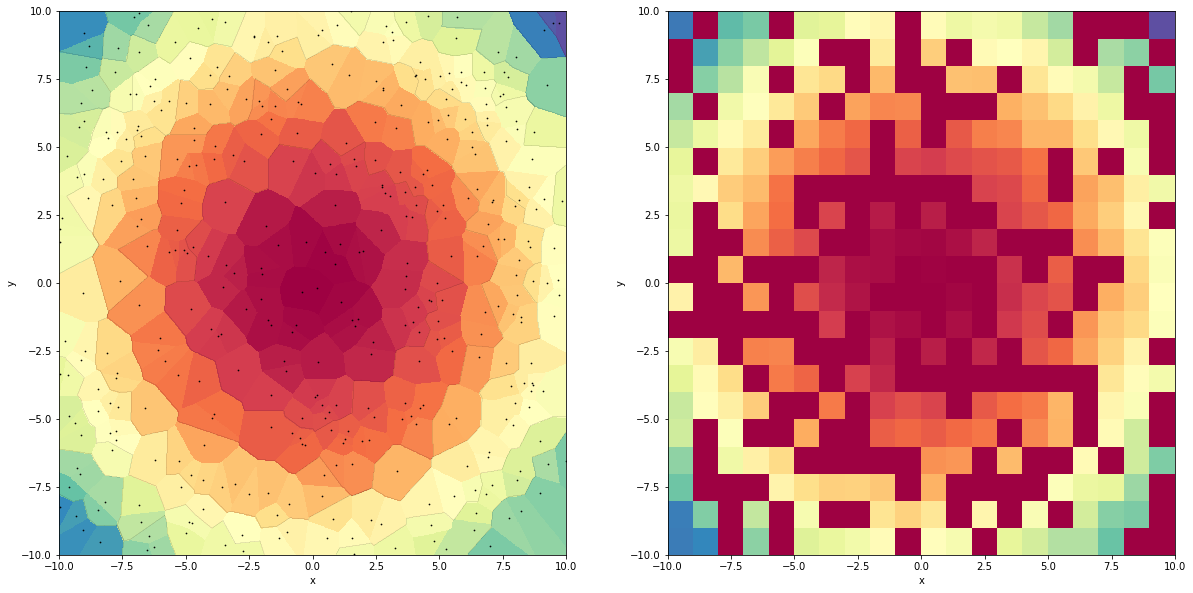

In [160]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(figsize=(20,10), ncols=2)
data['grid'].plot_map(fig, ax1, 'a', cmap='Spectral')
data['grid'].plot_contour(fig, ax1, 'a', colors='k', linewidths=0.1)
data['hist'].plot_map(fig, ax2, 'a', cmap='Spectral')
data['points'].plot_2d(fig, ax1, 'x', 'y', color='k', s=2, marker='.')


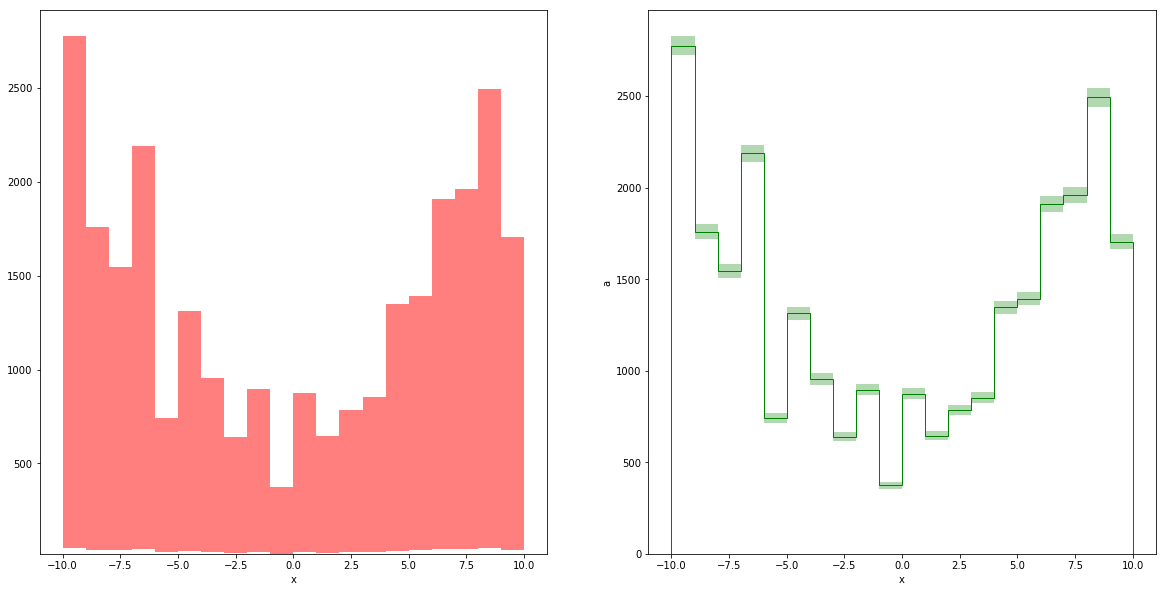

In [172]:
fig, (ax1, ax2) = plt.subplots(figsize=(20,10), ncols=2)
#data['hist_x'].plot_step(fig, ax1, 'a', histtype='stepfilled')
data['hist_x'].plot_band(fig, ax1, 'b', 'a', color='r', alpha=0.5)
data['hist_x'].plot_step(fig, ax2, 'a', histtype='step', color='g')
data['hist_x'].plot_errorband(fig, ax2, 'a', ('b','b'), color='g', alpha=0.3)
#ax2.set_xscale('log')